# 1. The main objective

### The main objective of the project is to build a series of scatter plots to visualize the weather of more than 500 cities all over the world of varying distance from the equator.

# 2. The prerequisites

### In order to accomplish this, we'll be based on a simple Python Library called " citypy " to simplify the looking up process for some city names with geo-coordinates when it comes to dealing with social data, and also we'll use a fast and easy-to-work API called " OpenWeather Map".

# 3. Some helpful Analysis of the Data

### Based on the cities tested, we can say that the weather becomes significantly warmer as one approaches the equator, which means the cities positioned at 0 degrees latitude experienced a smaller range of humidity than other cities, with a humidity no lower than 45%.

### There is no strong relationship between latitude and cloudiness. However, far more cities experienced 0% cloudiness as opposed to 100% cloudiness, outnumbering the latter by the dozens.

### There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

# Part_1 : WeatherPy

#### A. Installing the citipy Library in order to to determine city based on latitude and longitude

In [1]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=f941b05ac0303d05872451875b18e9d44b0058cb47949f2d89f6b06f88ea12de
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


#### B. Importing the native libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import datetime
import os
import pathlib

#Import The linear regression method to apply it on each relationship between temperature and latitude and so on
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Importy the citipy Library
from citipy import citipy

## Using os, pathlib to get the current file.


### We will delete the element of the list that represents the current name file 'starter_code' and we will replace it ### by our output_data and Images

In [3]:
current_path = pathlib.Path().resolve()
current_path

WindowsPath('C:/Users/lenovo/Desktop/06-Python-APIs (1)/06-Python-APIs/Instructions/starter_code')

#### We will split our current file to folder path and file which is the name of our current file

#### Folder_path will help us to uplod our output CSV file and images to any path we want.

In [4]:
folder_path, file = os.path.split(current_path)

In [5]:
print(f"Our global folders path is : {folder_path} and our current name file where we're executing this file is : {file}")

Our global folders path is : C:\Users\lenovo\Desktop\06-Python-APIs (1)\06-Python-APIs\Instructions and our current name file where we're executing this file is : starter_code


In [6]:
#Create today datetime Object
today_date = datetime.datetime.now()

In [7]:
# Range of latitudes and longitudes
latitude_range = (-90, 90)
longtitude_range = (-180, 180)

# Breakdown of Tasks

#### 1. Generate a random list of latitude, longtitude values using numpy, this random list is our cities list.

#### 2. Find nearest city using citypy for each latitude-longtitude coordinates combination.

In [8]:
# 1. Create a List of latitude_longtitude geographical coordinates that allow as to locate a point on the surface of the Earth.
lats_lngs_list = []

# Create a List of Cities
cities_list = []

# Create a list of random lats and lngs combinations with size of 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs_list = zip(lats, lngs)

# 2. Identify nearest city for each lat, lng combination

for lat_lng in lats_lngs_list:
    city_name = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Check wether out nearest city is unique, it it's true, we'll add it to our cities list
    if city_name not in cities_list:
        cities_list.append(city_name)
        
# Print the city count to confirm sufficient count
print(f"The Size of our nearest cities list is : {len(cities_list)}")

The Size of our nearest cities list is : 621


In [9]:
cities_list

['yellowknife',
 'barrow',
 'ushuaia',
 'melilla',
 'taolanaro',
 'mataura',
 'albany',
 'port alfred',
 'bluff',
 'sarkand',
 'tuktoyaktuk',
 'chokurdakh',
 'punta arenas',
 'rikitea',
 'carnarvon',
 'novikovo',
 'tarakan',
 'longyearbyen',
 'la paz',
 'saleaula',
 'qaanaaq',
 'jubayl',
 'khatanga',
 'ures',
 'new norfolk',
 'bandar-e lengeh',
 'provideniya',
 'mehamn',
 'anar darreh',
 'providencia',
 'mar del plata',
 'quelimane',
 'san carlos de bariloche',
 'vaini',
 'plettenberg bay',
 'victoria',
 'lebu',
 'saint-philippe',
 'east london',
 'phan rang',
 'tilichiki',
 'cao bang',
 'road town',
 'coihaique',
 'jian',
 'atambua',
 'cabo san lucas',
 'vaitupu',
 'rosario oeste',
 'faya',
 'svetlogorsk',
 'pundaguitan',
 'richards bay',
 'airai',
 'cape town',
 'boguchany',
 'avera',
 'amderma',
 'yerbogachen',
 'constitucion',
 'port keats',
 'puerto ayora',
 'dikson',
 'hambantota',
 'mys shmidta',
 'zeya',
 'viedma',
 'severo-kurilsk',
 'port elizabeth',
 'samusu',
 'olafsvik',
 

#### 3. Perform weather API call using imported API key to perform a weather check on each city, and include a print log of each city as it's being processed (with the city number and city name).

In [10]:
#API_Call infos
weather_url = f"https://api.openweathermap.org/data/2.5/weather?"
city_weather_responses = []

#Initialize the lists for the DataFrame
records = 1
sets = 1
city_name = []
Lat = [] 
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

print("Beginning Data Retrieval\n")
print("--------------------------------------------")

#Looping through the cities and perform a request for data on each one
for city in cities_list:

    #This condition allows us to create a 50 record for each set, then for each unique set, we'll display all the 50 cities informations. 
    if records == 51:
        sets = sets + 1
        records = 1
    
    #The full link of the weather API of each city
    query_url = f"{weather_url}q={city}&appid={weather_api_key}"
    
    # Get back a JSON infos for each city by the request librabry that will access the website to bring back the necessary infos
    city_weather_response = requests.get(query_url).json()  
    
    #Making sure the code doesn't break  
    try:
        print(f"Processing Record {records} of set {sets} | {city}")
        print(f"To get the XML File of all weather informations of the city named : [ {city} ] is by clicking on the link: {query_url}")
        print('-------------------------------------------- \n')
        
        # Insert our amm different city Names into a list that we'll use it after for out Df.
        city_name.append(city_weather_response['name'])
        
        #Lists to hold reponse info
        Lat.append(city_weather_response['coord']['lat'])
        Lng.append(city_weather_response['coord']['lon'])
        Max_Temp.append(city_weather_response['main']['temp_max'])
        Humidity.append(city_weather_response['main']['humidity'])
        Cloudiness.append(city_weather_response['clouds']['all'])
        Wind_Speed.append(city_weather_response['wind']['speed'])
        Country.append(city_weather_response['sys']['country'])
        Date.append(city_weather_response['dt'])
        
        # Insert each city weather on the city_weather_responses list
        city_weather_responses.append(city_weather_response)
        
        #Increment the number of each set so it'll be 50 record of each set
        records = records + 1
    
    except (NameError, KeyError) as e:
        print(f"The City named [ { city } ] was not found. Skipping... ") 
        pass

    
print('-------------------------------------------- \n Data Retrieval Complete \n-------------------------------------------- ')

Beginning Data Retrieval

--------------------------------------------
Processing Record 1 of set 1 | yellowknife
To get the XML File of all weather informations of the city named : [ yellowknife ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 2 of set 1 | barrow
To get the XML File of all weather informations of the city named : [ barrow ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=barrow&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 3 of set 1 | ushuaia
To get the XML File of all weather informations of the city named : [ ushuaia ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 4 of set 1 | melilla
To get t

Processing Record 25 of set 1 | mehamn
To get the XML File of all weather informations of the city named : [ mehamn ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=mehamn&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 26 of set 1 | anar darreh
To get the XML File of all weather informations of the city named : [ anar darreh ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=anar darreh&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

The City named [ anar darreh ] was not found. Skipping... 
Processing Record 26 of set 1 | providencia
To get the XML File of all weather informations of the city named : [ providencia ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=providencia&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 27 of set 1 | mar del plat

Processing Record 49 of set 1 | cape town
To get the XML File of all weather informations of the city named : [ cape town ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=cape town&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 50 of set 1 | boguchany
To get the XML File of all weather informations of the city named : [ boguchany ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=boguchany&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 1 of set 2 | avera
To get the XML File of all weather informations of the city named : [ avera ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=avera&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 2 of set 2 | amderma
To get the XML File of all weather informations of the city named : [ amderma ] 

Processing Record 21 of set 2 | gamba
To get the XML File of all weather informations of the city named : [ gamba ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=gamba&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 22 of set 2 | jamestown
To get the XML File of all weather informations of the city named : [ jamestown ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=jamestown&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 23 of set 2 | grand gaube
To get the XML File of all weather informations of the city named : [ grand gaube ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=grand gaube&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 24 of set 2 | esperance
To get the XML File of all weather informations of the city named : [ 

Processing Record 46 of set 2 | klamath falls
To get the XML File of all weather informations of the city named : [ klamath falls ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=klamath falls&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 47 of set 2 | port hardy
To get the XML File of all weather informations of the city named : [ port hardy ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=port hardy&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 48 of set 2 | hermanus
To get the XML File of all weather informations of the city named : [ hermanus ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=hermanus&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 49 of set 2 | muros
To get the XML File of all weather informations of the c

Processing Record 23 of set 3 | susanville
To get the XML File of all weather informations of the city named : [ susanville ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=susanville&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 24 of set 3 | ribeira grande
To get the XML File of all weather informations of the city named : [ ribeira grande ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=ribeira grande&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 25 of set 3 | katsuura
To get the XML File of all weather informations of the city named : [ katsuura ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=katsuura&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 26 of set 3 | rameshki
To get the XML File of all weather informations of

Processing Record 50 of set 3 | georgetown
To get the XML File of all weather informations of the city named : [ georgetown ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=georgetown&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 1 of set 4 | sunrise manor
To get the XML File of all weather informations of the city named : [ sunrise manor ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=sunrise manor&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 2 of set 4 | dordrecht
To get the XML File of all weather informations of the city named : [ dordrecht ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=dordrecht&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 3 of set 4 | gat
To get the XML File of all weather informations of the cit

Processing Record 27 of set 4 | colares
To get the XML File of all weather informations of the city named : [ colares ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=colares&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 28 of set 4 | port hedland
To get the XML File of all weather informations of the city named : [ port hedland ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=port hedland&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 29 of set 4 | asadabad
To get the XML File of all weather informations of the city named : [ asadabad ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=asadabad&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 30 of set 4 | poronaysk
To get the XML File of all weather informations of the city name

Processing Record 50 of set 4 | coihueco
To get the XML File of all weather informations of the city named : [ coihueco ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=coihueco&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 1 of set 5 | talnakh
To get the XML File of all weather informations of the city named : [ talnakh ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=talnakh&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 2 of set 5 | kruisfontein
To get the XML File of all weather informations of the city named : [ kruisfontein ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=kruisfontein&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 3 of set 5 | khonuu
To get the XML File of all weather informations of the city named : [ 

Processing Record 25 of set 5 | kavieng
To get the XML File of all weather informations of the city named : [ kavieng ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=kavieng&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 26 of set 5 | tessalit
To get the XML File of all weather informations of the city named : [ tessalit ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=tessalit&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 27 of set 5 | egvekinot
To get the XML File of all weather informations of the city named : [ egvekinot ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=egvekinot&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 28 of set 5 | ebebiyin
To get the XML File of all weather informations of the city named : [ ebeb

Processing Record 2 of set 6 | young
To get the XML File of all weather informations of the city named : [ young ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=young&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 3 of set 6 | pingzhuang
To get the XML File of all weather informations of the city named : [ pingzhuang ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=pingzhuang&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 4 of set 6 | bom jesus
To get the XML File of all weather informations of the city named : [ bom jesus ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=bom jesus&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 5 of set 6 | alice springs
To get the XML File of all weather informations of the city named : [ ali

Processing Record 26 of set 6 | buin
To get the XML File of all weather informations of the city named : [ buin ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=buin&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 27 of set 6 | lashio
To get the XML File of all weather informations of the city named : [ lashio ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=lashio&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 28 of set 6 | vigrestad
To get the XML File of all weather informations of the city named : [ vigrestad ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=vigrestad&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 29 of set 6 | youghal
To get the XML File of all weather informations of the city named : [ youghal ] is by clic

Processing Record 2 of set 7 | araouane
To get the XML File of all weather informations of the city named : [ araouane ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=araouane&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 3 of set 7 | pevek
To get the XML File of all weather informations of the city named : [ pevek ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=pevek&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 4 of set 7 | kaitangata
To get the XML File of all weather informations of the city named : [ kaitangata ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=kaitangata&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 5 of set 7 | terrell
To get the XML File of all weather informations of the city named : [ terrell ] is

Processing Record 26 of set 7 | gornyak
To get the XML File of all weather informations of the city named : [ gornyak ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=gornyak&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 27 of set 7 | rockingham
To get the XML File of all weather informations of the city named : [ rockingham ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=rockingham&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 28 of set 7 | fairfield
To get the XML File of all weather informations of the city named : [ fairfield ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=fairfield&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 29 of set 7 | yeniseysk
To get the XML File of all weather informations of the city named :

Processing Record 4 of set 8 | los llanos de aridane
To get the XML File of all weather informations of the city named : [ los llanos de aridane ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 5 of set 8 | foam lake
To get the XML File of all weather informations of the city named : [ foam lake ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=foam lake&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 6 of set 8 | coahuayana
To get the XML File of all weather informations of the city named : [ coahuayana ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=coahuayana&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 7 of set 8 | tangermunde
To get the XML File of all 

Processing Record 31 of set 8 | autopan
To get the XML File of all weather informations of the city named : [ autopan ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=autopan&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

The City named [ autopan ] was not found. Skipping... 
Processing Record 31 of set 8 | lompoc
To get the XML File of all weather informations of the city named : [ lompoc ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=lompoc&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 32 of set 8 | liyang
To get the XML File of all weather informations of the city named : [ liyang ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=liyang&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 33 of set 8 | noyabrsk
To get the XML File of all weather

Processing Record 7 of set 9 | asti
To get the XML File of all weather informations of the city named : [ asti ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=asti&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 8 of set 9 | cascais
To get the XML File of all weather informations of the city named : [ cascais ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=cascais&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 9 of set 9 | nshamba
To get the XML File of all weather informations of the city named : [ nshamba ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=nshamba&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 10 of set 9 | diffa
To get the XML File of all weather informations of the city named : [ diffa ] is by clicking on th

Processing Record 34 of set 9 | salym
To get the XML File of all weather informations of the city named : [ salym ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=salym&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 35 of set 9 | casa grande
To get the XML File of all weather informations of the city named : [ casa grande ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=casa grande&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 36 of set 9 | riyadh
To get the XML File of all weather informations of the city named : [ riyadh ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=riyadh&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 37 of set 9 | kalmunai
To get the XML File of all weather informations of the city named : [ kalmunai ]

Processing Record 11 of set 10 | antofagasta
To get the XML File of all weather informations of the city named : [ antofagasta ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=antofagasta&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 12 of set 10 | sukumo
To get the XML File of all weather informations of the city named : [ sukumo ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=sukumo&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 13 of set 10 | sesheke
To get the XML File of all weather informations of the city named : [ sesheke ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=sesheke&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 14 of set 10 | salihorsk
To get the XML File of all weather informations of the city named : [

Processing Record 37 of set 10 | pyay
To get the XML File of all weather informations of the city named : [ pyay ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=pyay&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 38 of set 10 | noumea
To get the XML File of all weather informations of the city named : [ noumea ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=noumea&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 39 of set 10 | batemans bay
To get the XML File of all weather informations of the city named : [ batemans bay ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=batemans bay&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 40 of set 10 | muisne
To get the XML File of all weather informations of the city named : [ muisne ]

Processing Record 13 of set 11 | ucluelet
To get the XML File of all weather informations of the city named : [ ucluelet ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=ucluelet&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 14 of set 11 | poyarkovo
To get the XML File of all weather informations of the city named : [ poyarkovo ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=poyarkovo&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 15 of set 11 | basoko
To get the XML File of all weather informations of the city named : [ basoko ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=basoko&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 16 of set 11 | sydney mines
To get the XML File of all weather informations of the city named : [

Processing Record 39 of set 11 | sorong
To get the XML File of all weather informations of the city named : [ sorong ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=sorong&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 40 of set 11 | ayagoz
To get the XML File of all weather informations of the city named : [ ayagoz ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=ayagoz&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 41 of set 11 | beringovskiy
To get the XML File of all weather informations of the city named : [ beringovskiy ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=beringovskiy&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 42 of set 11 | clocolan
To get the XML File of all weather informations of the city named : [ 

Processing Record 15 of set 12 | gurskoye
To get the XML File of all weather informations of the city named : [ gurskoye ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=gurskoye&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

The City named [ gurskoye ] was not found. Skipping... 
Processing Record 15 of set 12 | kattivakkam
To get the XML File of all weather informations of the city named : [ kattivakkam ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=kattivakkam&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 16 of set 12 | honiara
To get the XML File of all weather informations of the city named : [ honiara ] is by clicking on the link: https://api.openweathermap.org/data/2.5/weather?q=honiara&appid=849cb715244fa751de756b3c473e27cf
-------------------------------------------- 

Processing Record 17 of set 12 | santa
To get the 

#### 4. Convert arrays of JSON into pandas dataframe.
##### We will export the cities Data into a csv File
##### We will display the DataFrame

In [11]:
#Creating our DataFrame Columns

weather_dict = {
        'City' : city_name,
        'Latitude' : Lat,
        'Longitude' : Lng,
        'Max Temperature' : Max_Temp,
        'Humidity' : Humidity,
        'Cloudiness' : Cloudiness,
        'Wind Speed' : Wind_Speed,
        'Country' : Country,
        'Date' : Date
        }

#Creating our DataFrame Based on 
cities_df = pd.DataFrame(weather_dict) 

In [12]:
cities_df.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,291.44,63,40,8.23,CA,1654968745
1,Barrow,71.2906,-156.7887,274.16,80,100,7.20,US,1654968749
2,Ushuaia,-54.8000,-68.3000,277.96,87,75,2.57,AR,1654968697
3,Melilla,35.2937,-2.9383,300.26,69,0,3.09,ES,1654968750
4,Mataura,-46.1927,168.8643,276.19,88,77,3.05,NZ,1654968752
5,Albany,42.6001,-73.9662,297.55,52,100,2.06,US,1654968753
6,Port Alfred,-33.5906,26.8910,293.62,39,55,4.30,ZA,1654968753
7,Bluff,-46.6000,168.3333,276.37,72,94,7.63,NZ,1654968754
8,Sarkand,45.4100,79.9186,292.65,58,100,2.73,KZ,1654968755
9,Tuktoyaktuk,69.4541,-133.0374,276.15,93,100,5.14,CA,1654968755


In [13]:
print(f"Our random Cities were about {len(cities_list)} city after the API process, we have only {len(cities_df)}, that means that {len(cities_list) - len(cities_df)} city was unable  for the API to find about it.")

Our random Cities were about 621 city after the API process, we have only 573, that means that 48 city was unable  for the API to find about it.


#### 5. Inspect the data and remove the cities where the humidity > 100%.

In [14]:
cities_df.count()

City               573
Latitude           573
Longitude          573
Max Temperature    573
Humidity           573
Cloudiness         573
Wind Speed         573
Country            573
Date               573
dtype: int64

In [15]:
df_filtered = cities_df[cities_df["Humidity"]<=100]
df_filtered.count()

City               573
Latitude           573
Longitude          573
Max Temperature    573
Humidity           573
Cloudiness         573
Wind Speed         573
Country            573
Date               573
dtype: int64

In [16]:
df_filtered

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,291.44,63,40,8.23,CA,1654968745
1,Barrow,71.2906,-156.7887,274.16,80,100,7.20,US,1654968749
2,Ushuaia,-54.8000,-68.3000,277.96,87,75,2.57,AR,1654968697
3,Melilla,35.2937,-2.9383,300.26,69,0,3.09,ES,1654968750
4,Mataura,-46.1927,168.8643,276.19,88,77,3.05,NZ,1654968752
...,...,...,...,...,...,...,...,...,...
568,Praia,14.9215,-23.5087,301.45,61,0,4.12,CV,1654969216
569,Utica,43.1009,-75.2327,297.79,52,83,2.61,US,1654969217
570,Diamantina,-18.2494,-43.6003,297.73,36,57,1.76,BR,1654969217
571,Tooele,40.5308,-112.2983,304.83,28,81,2.59,US,1654969218


#### 6. Get the indices of cities that have humidity over 100%.

In [17]:
df_filtered["Humidity"].max()

100

In [18]:
df_filtered.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,18.863918,16.724940,293.660942,66.727749,56.766143,3.708674,1.654969e+09
std,33.808899,88.596879,8.457819,22.166390,36.711802,2.375407,1.417433e+02
min,-54.800000,-179.166700,272.030000,6.000000,0.000000,0.000000,1.654969e+09
25%,-10.405600,-62.996700,287.640000,54.000000,20.000000,1.970000,1.654969e+09
50%,22.933300,23.371600,294.560000,71.000000,62.000000,3.130000,1.654969e+09
75%,48.383500,87.983300,299.400000,84.000000,93.000000,5.140000,1.654969e+09
max,78.218600,179.316700,314.390000,100.000000,100.000000,13.380000,1.654969e+09


#### 7. Make a new DataFrame equal to the city data to drop all humidity outliers by index. ? 
#### Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [19]:
df_filtered = cities_df[cities_df["Humidity"] < 100]

df_filtered = pd.DataFrame(
    {
        'City' : city_name,
        'Latitude' : Lat,
        'Longitude' : Lng,
        'Max Temperature' : Max_Temp,
        'Humidity' : Humidity,
        'Cloudiness' : Cloudiness,
        'Wind Speed' : Wind_Speed,
        'Country' : Country,
        'Date' : Date
})

In [20]:
df_filtered.columns

Index(['City', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity',
       'Cloudiness', 'Wind Speed', 'Country', 'Date'],
      dtype='object')

#### 8. Export city data into csv

In [21]:
cleaned_cities_file = "Clean_City_Data.csv"
df_filtered.to_csv(os.path.join(folder_path,'output_data',cleaned_cities_file), index_label = "clean_city_data")

# Plotting The Data

#### a. Build a scatterplot for City Latitude vs. Temperature using matplotlib.pyplot.

### Latitude vs. Temperature Plot

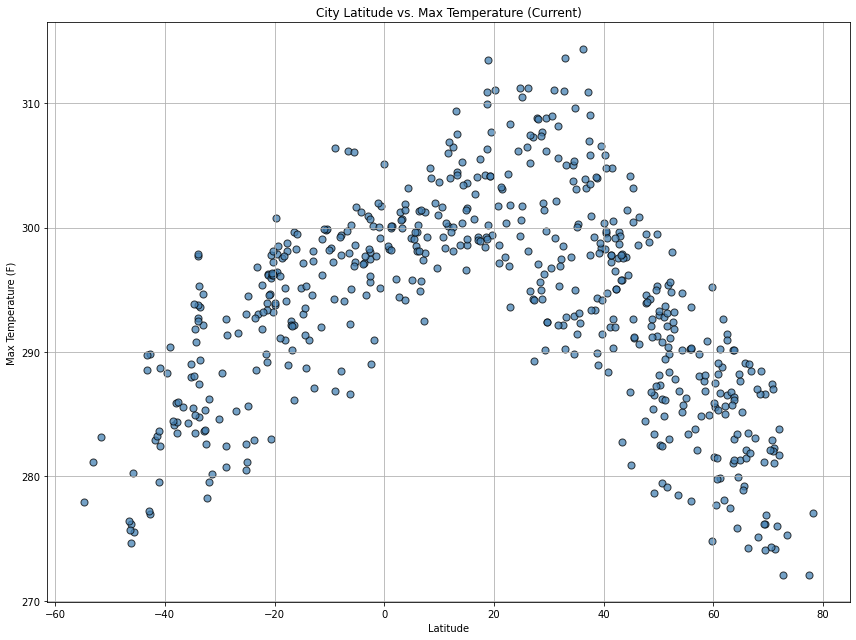

In [22]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# Save the figure
# Show plot
fig = plt.figure(1, figsize=[12, 9])
scat_lat = df_filtered["Latitude"]
scat_temp = df_filtered["Max Temperature"]

plt.scatter(scat_lat,scat_temp,marker='o', facecolor='steelblue', edgecolor='black',s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs. Max Temperature (Current)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(folder_path,'output_data','lat_temp'))
plt.show()

### Interpretation : We can say that the emperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. Generally, around the world, it gets warmer towards the equator and cooler towards the poles.

#### b. Build a scatterplot for City Latitude vs. Humidity using matplotlib.pyplot.

### Latitude vs. Humidity Plot

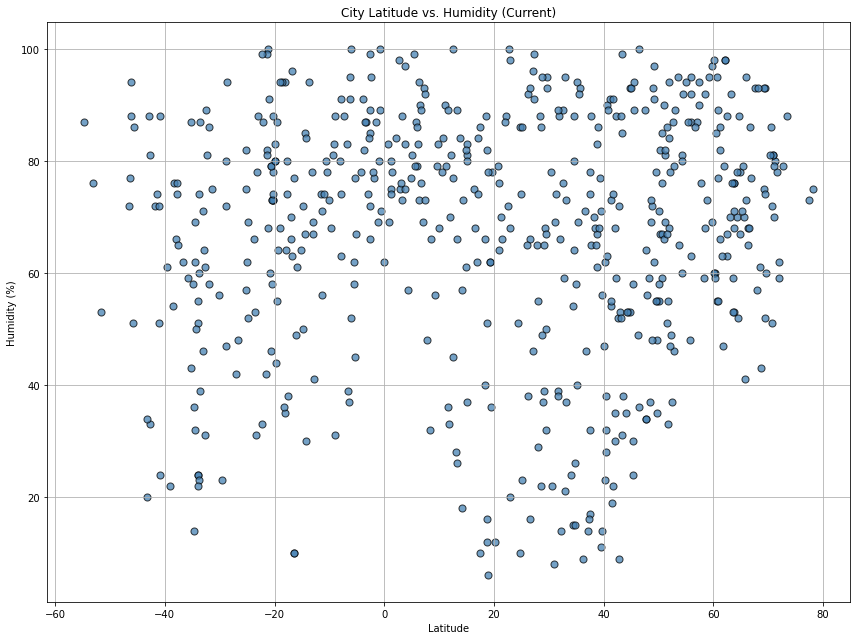

In [23]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# Save the figure
# Show plot

fig = plt.figure(1, figsize=[12, 9])
scat_lat = df_filtered["Latitude"]
scat_hum = df_filtered["Humidity"]

plt.scatter(scat_lat,scat_hum,marker='o', facecolor='steelblue', edgecolor='black',s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs. Humidity (Current)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(folder_path,'output_data','lat_hum'))
plt.show()

### Interpretation : We can say that Humidity depends on Latitude and there's a higher correlation as when latitude increaser, the humidity increases and vice versa. is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. Generally, around the world, it gets warmer towards the equator and cooler towards the poles.

#### c. Build a scatterplot for City Latitude vs. Cloudiness using matplotlib.pyplot.

### Latitude vs. Cloudiness Plot

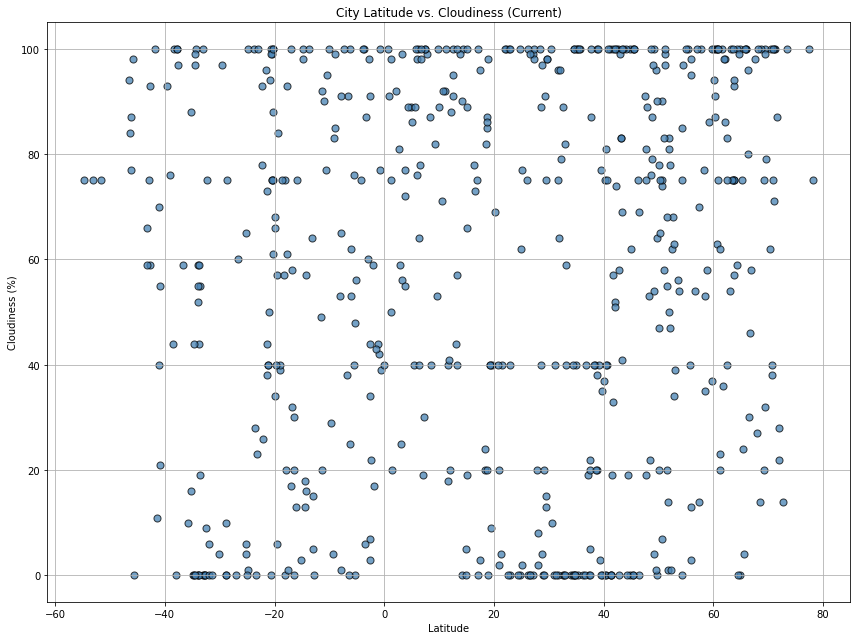

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# Save the figure
# Show plot

fig = plt.figure(1, figsize=[12, 9])
scat_lat = df_filtered["Latitude"]
scat_cloud = df_filtered["Cloudiness"]

plt.scatter(scat_lat,scat_cloud, marker='o', facecolor='steelblue', edgecolor='black', s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs. Cloudiness (Current)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(folder_path,'output_data','lat_cloud'))
plt.show()

### Interpretation : As latitude increases the intensity of the solar energy that strikes an area decreases and climates become cooler so more clouds. … The higher the elevation the colder the air and therefore the colder the climate

#### Build a scatterplot for City Latitude vs. Wind Speed using matplotlib.pyplot.

### Latitude vs. Wind Speed Plot

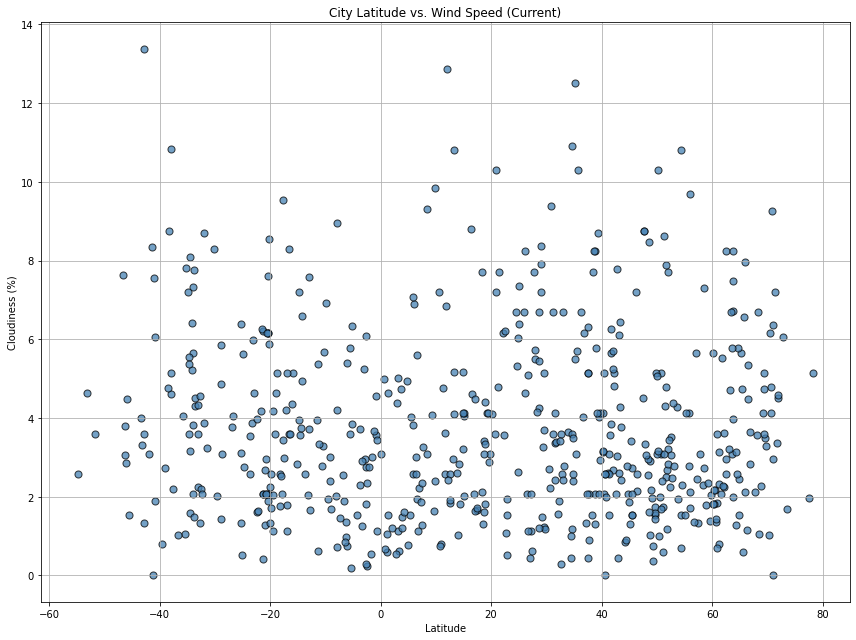

In [25]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Save the figure
# Show plot

fig = plt.figure(1, figsize=[12, 9])
scat_lat = df_filtered["Latitude"]
scat_wind_speed = df_filtered["Wind Speed"]

plt.scatter(scat_lat,scat_wind_speed, marker='o', facecolor='steelblue', edgecolor='black', s=50, alpha=0.75, linewidth=1)
plt.title('City Latitude vs. Wind Speed (Current)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join(folder_path,'output_data','lat_wind_speed'))

### Interpretation : We can say that cities that are near to the equator are characterized by low winds,  while mid-latitudes experience much faster airflow.

# Linear Regression

#### a. We will create a function that can be able to develop a Linear Regression plots.

In [26]:
def plot_metric_with_linear_regression(figure_number,name_image,x_series, y_series, x_label, y_label, title):
    fig = plt.figure(figure_number, figsize=[12, 9])
    plt.scatter(x_series,y_series)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
    regress_values = x_series * slope + intercept
    plt.plot(x_series,regress_values,"r-")
    annotate_x = x_series.mean()
    annotate_y = annotate_x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(annotate_x,annotate_y),color="red",fontsize=20,fontweight="bold")
    plt.annotate(f"r={rvalue:.2f}",(x_series.min(),y_series.min()),color="red",fontsize=20,fontweight="bold")
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(os.path.join(folder_path,'output_data',name_image))
    plt.show()
    return plt

#### b. Create Northern and Southern Hemisphere DataFrames

In [27]:
northlat_df = df_filtered.loc[df_filtered["Latitude"] >= 0,:]
southlat_df = df_filtered.loc[df_filtered["Latitude"] < 0,:]

In [28]:
# Flip the negative sign of the southern latitudes, to indicate distance away from the equator
southlat_df["Latitude"] *= -1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_752\1320732964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southlat_df["Latitude"] *= -1


In [29]:
northlat_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,291.44,63,40,8.23,CA,1654968745
1,Barrow,71.2906,-156.7887,274.16,80,100,7.20,US,1654968749
3,Melilla,35.2937,-2.9383,300.26,69,0,3.09,ES,1654968750
5,Albany,42.6001,-73.9662,297.55,52,100,2.06,US,1654968753
8,Sarkand,45.4100,79.9186,292.65,58,100,2.73,KZ,1654968755


In [30]:
southlat_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ushuaia,54.8000,-68.3000,277.96,87,75,2.57,AR,1654968697
4,Mataura,46.1927,168.8643,276.19,88,77,3.05,NZ,1654968752
6,Port Alfred,33.5906,26.8910,293.62,39,55,4.30,ZA,1654968753
7,Bluff,46.6000,168.3333,276.37,72,94,7.63,NZ,1654968754
11,Punta Arenas,53.1500,-70.9167,281.16,76,75,4.63,CL,1654968757


#### Use function to plot Max Temp vs. Latitude Linear Regression for northern and southern hemisphere

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

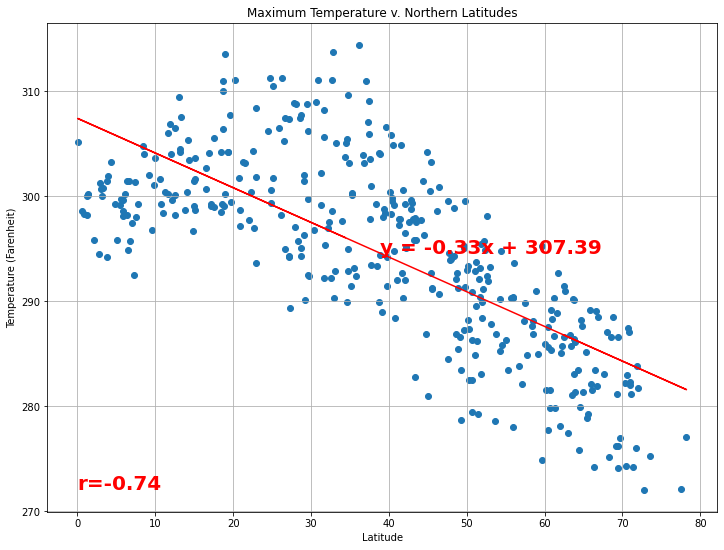

In [31]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temperature"]

name_image = "northerntemplat.png"
plt = plot_metric_with_linear_regression(5,name_image,x_values, y_values,"Latitude", "Temperature (Farenheit)", "Maximum Temperature v. Northern Latitudes")

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

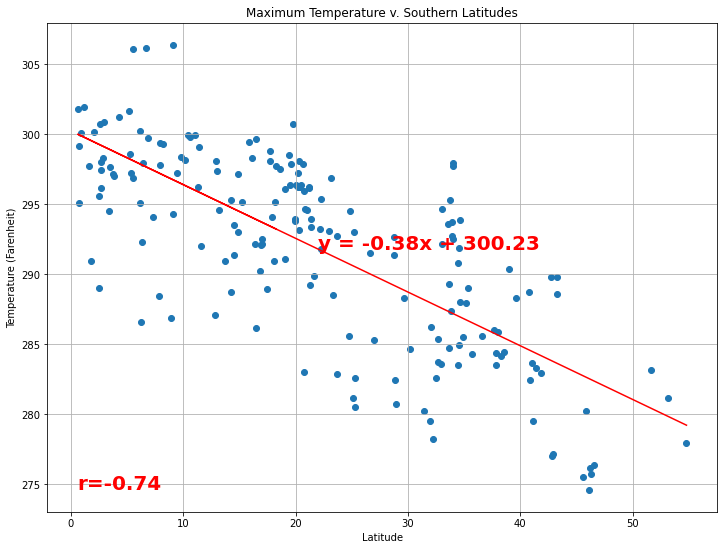

In [32]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temperature"]
name_image = "southerntemplat.png"
plt = plot_metric_with_linear_regression(6,name_image,x_values, y_values,"Latitude", "Temperature (Farenheit)", "Maximum Temperature v. Southern Latitudes")

### Interpretation : We can say that The high r value indicates a strong positive correlation between latitude and max temperature.

#### Use function to plot Humidity (%) vs. Latitude Linear Regression for northern and southern hemisphere.

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

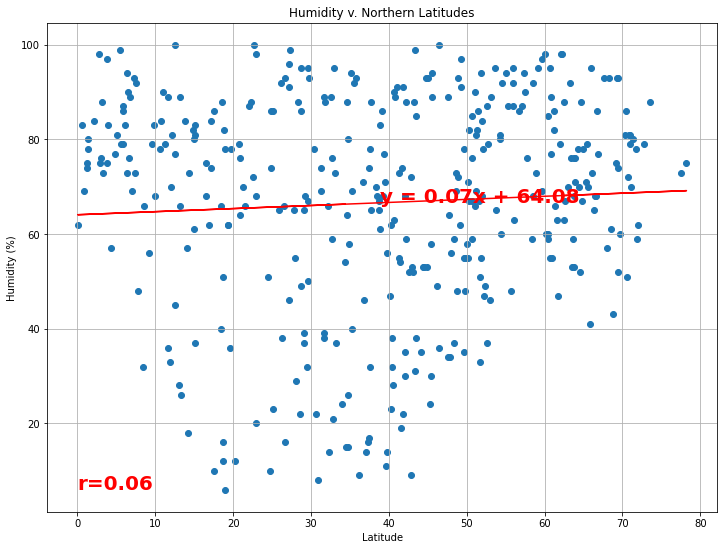

In [33]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
name_image = "northernhumlat.png"
plt = plot_metric_with_linear_regression(7,name_image,x_values, y_values,"Latitude", "Humidity (%)", "Humidity v. Northern Latitudes")

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

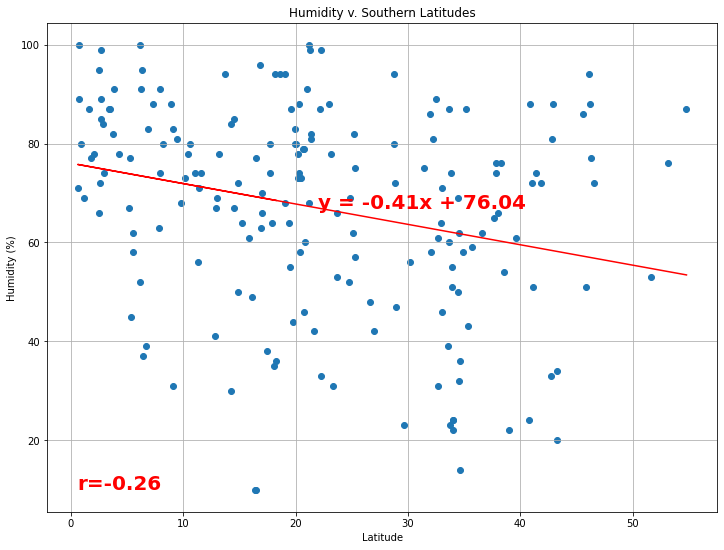

In [34]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
name_image = "sotuhernhumlat.png"
plt = plot_metric_with_linear_regression(8,name_image,x_values, y_values,"Latitude", "Humidity (%)", "Humidity v. Southern Latitudes")

### Interpretation : We can say that The low r values indicate a weak to no relationship between humidity and latitude.

#### Use function to plot Cloudiness (%) vs. Latitude Linear Regression for northern and southern hemisphere.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

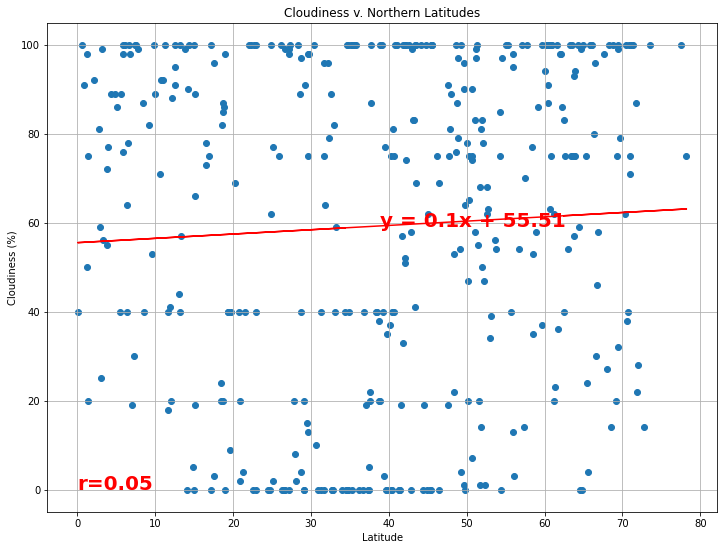

In [35]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
name_image = "northerncloudlat.png"
plt = plot_metric_with_linear_regression(9,name_image,x_values, y_values,"Latitude", "Cloudiness (%)", "Cloudiness v. Northern Latitudes")

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

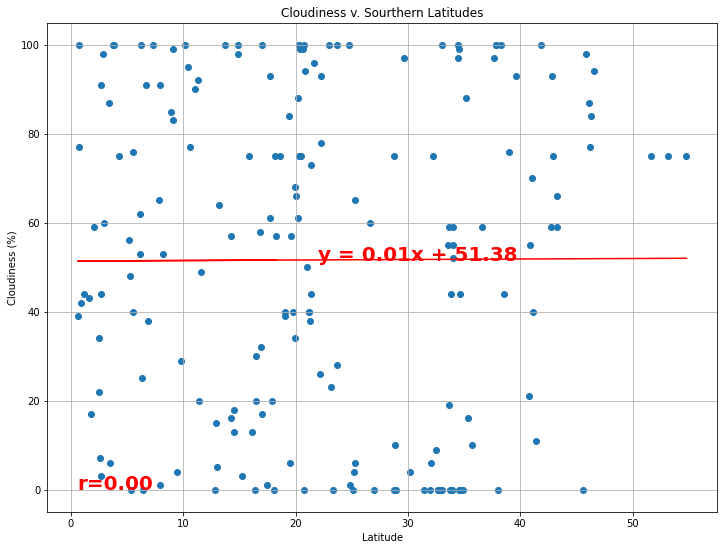

In [36]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
name_image = "southerncloudlat.png"
plt = plot_metric_with_linear_regression(10,name_image,x_values, y_values,"Latitude", "Cloudiness (%)", "Cloudiness v. Sourthern Latitudes")

### Interpretation : We can cay that The low r values indicate a weak positive relationship between latitude and cloudiness.

#### Use function to plot Wind Speed (mph) vs. Latitude Linear Regression for northern and southern hemisphere.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

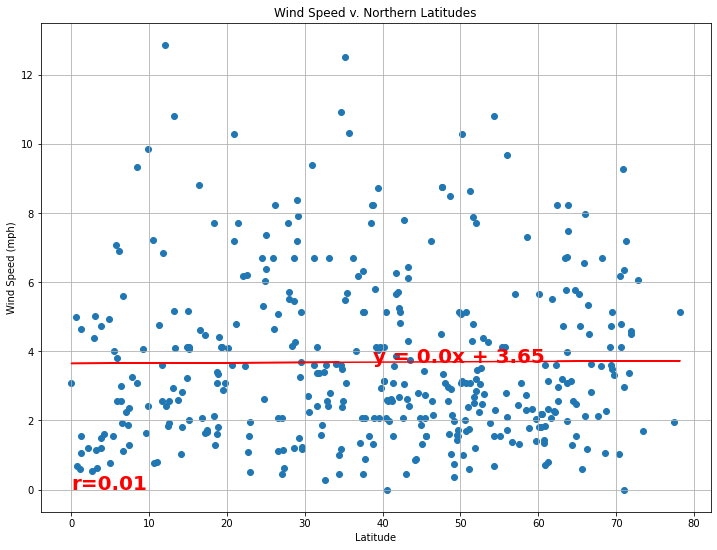

In [37]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]

name_image = "northernwindlat.png"
plt = plot_metric_with_linear_regression(11,name_image,x_values, y_values,"Latitude", "Wind Speed (mph)", "Wind Speed v. Northern Latitudes")

##### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

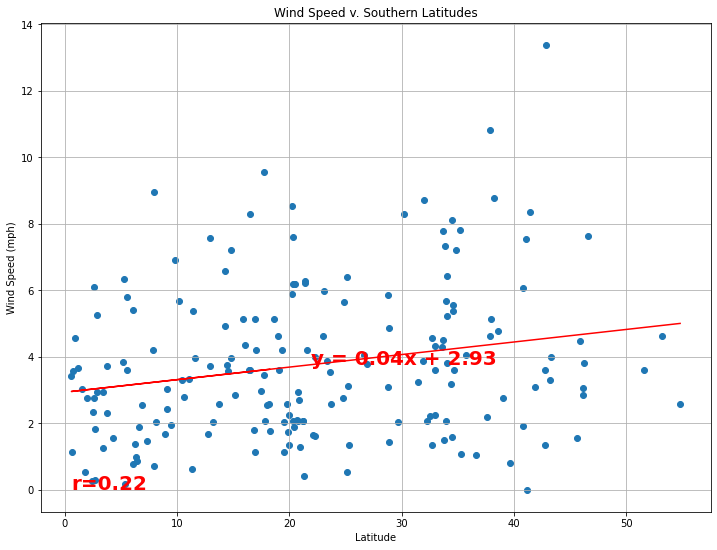

In [38]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]

name_image = "southernwindlat.png"
plt = plot_metric_with_linear_regression(12,name_image,x_values, y_values,"Latitude", "Wind Speed (mph)", "Wind Speed v. Southern Latitudes")

### Interpretation : We can say that The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.